# Deep Learning Tutorial - EDA
Data set source: https://sci2s.ugr.es/keel/category.php?cat=clas&order=clasR#sub2.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
header_values = []
with open('./data/zoo.dat', 'r') as zoo_file:
    for line in zoo_file:
        if '@attribute' in line:
            header_values.append(line.split()[1])

In [3]:
df = pd.read_csv('./data/zoo.dat', skiprows=21, header=None, names=header_values)

In [4]:
df.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
1,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Hair      101 non-null    int64
 1   Feathers  101 non-null    int64
 2   Eggs      101 non-null    int64
 3   Milk      101 non-null    int64
 4   Airborne  101 non-null    int64
 5   Aquatic   101 non-null    int64
 6   Predator  101 non-null    int64
 7   Toothed   101 non-null    int64
 8   Backbone  101 non-null    int64
 9   Breathes  101 non-null    int64
 10  Venomous  101 non-null    int64
 11  Fins      101 non-null    int64
 12  Legs      101 non-null    int64
 13  Tail      101 non-null    int64
 14  Domestic  101 non-null    int64
 15  Catsize   101 non-null    int64
 16  Type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
Feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
Eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
Milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
Airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
Aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
Predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
Toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
Backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
Breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


## Data Visualization

In [7]:
df_type = pd.DataFrame(df['Type'].value_counts()).T

In [8]:
df_hair = pd.DataFrame(df['Hair'].value_counts()).T

In [9]:
df_test = pd.concat([df_type, df_hair], axis=0)

In [10]:
df_test

,0,1,2,3,4,5,6,7
Type,NaN,41,20.0,5.0,13.0,4.0,8.0,10.0
Hair,58.0,43,NaN,NaN,NaN,NaN,NaN,NaN


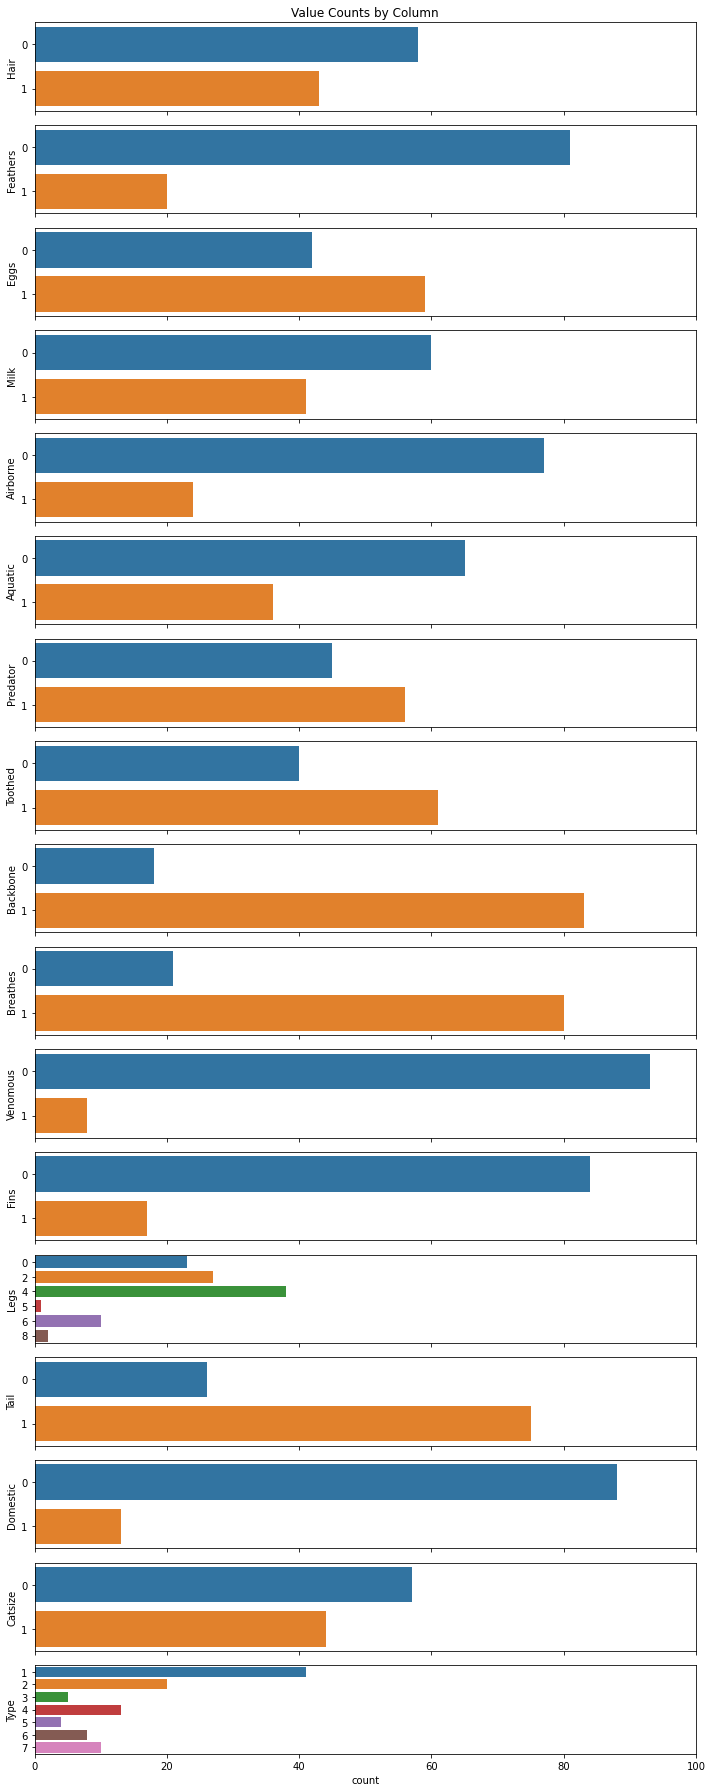

In [11]:
columns = df.columns.tolist()
fig, ax = plt.subplots(len(columns), 1, figsize=(10, int(1.5*len(columns))))
for i, column in enumerate(columns):
    _ = sns.countplot(y=df[column], data=df, ax=ax[i])
    ax[i].set_xlim([0, 100])
    if i < len(columns) - 1:
        ax[i].set_xlabel('')
        ax[i].set_xticklabels([])
    if i == 0:
        ax[i].set_title('Value Counts by Column')
plt.tight_layout()
plt.show()